# Belarus Car Price Prediction
The aim of this project is to predict the price of the car in Belarus, by analyzing the car
features such as brand, year, engine, fuel type, transmission, mileage, drive unit, color,
and segment. The project also aims to find out the set the of variables that has most
impact on the car price.

## Our target variable is priceUSD and rest are independent variable

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [162]:
df = pd.read_csv('cars.csv')

In [4]:
df.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


In [5]:
# check the shape of rows and columns
df.shape

(56244, 12)

In [6]:
# Check the null values
df.isnull().sum()

make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              47
color                     0
transmission              0
drive_unit             1905
segment                5291
dtype: int64

In [7]:
# check the data types
df.dtypes

make                    object
model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
drive_unit              object
segment                 object
dtype: object

In [8]:
# check the unique values present in the data set
df.nunique()

make                     96
model                  1034
priceUSD               2970
year                     78
condition                 3
mileage(kilometers)    8400
fuel_type                 3
volume(cm3)             458
color                    13
transmission              2
drive_unit                4
segment                   9
dtype: int64

In [9]:
df['make'].unique()

array(['mazda', 'mg', 'renault', 'gaz', 'aro', 'rover', 'uaz',
       'alfa-romeo', 'audi', 'oldsmobile', 'saab', 'peugeot', 'chrysler',
       'wartburg', 'moskvich', 'volvo', 'fiat', 'roewe', 'porsche', 'zaz',
       'luaz', 'dacia', 'lada-vaz', 'izh', 'raf', 'bogdan', 'bmw',
       'nissan', 'mercedes-benz', 'mitsubishi', 'toyota', 'chery', 'gmc',
       'hyundai', 'honda', 'ssangyong', 'suzuki', 'opel', 'seat',
       'volkswagen', 'daihatsu', 'chevrolet', 'geely', 'saturn', 'kia',
       'lincoln', 'eksklyuziv', 'citroen', 'dong-feng', 'pontiac', 'ford',
       'subaru', 'bentley', 'faw', 'cadillac', 'lifan', 'plymouth',
       'hafei', 'shanghai-maple', 'mini', 'jeep', 'skoda', 'mercury',
       'changan', 'lexus', 'isuzu', 'aston-martin', 'lancia',
       'great-wall', 'land-rover', 'jaguar', 'buick', 'daewoo', 'vortex',
       'infiniti', 'byd', 'smart', 'maserati', 'haval', 'acura', 'scion',
       'tata', 'datsun', 'tesla', 'mclaren', 'ravon', 'trabant', 'proton',
       'fso

In [10]:
# describe the stats
df.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56244.000000,56244.000000,5.624400e+04,56197.000000
mean,7415.456440,2003.454840,2.443956e+05,2104.860615
std,8316.959261,8.144247,3.210307e+05,959.201633
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.285000e+05,1996.000000
75%,9807.500000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


In [11]:
# Drop the unnessecary columns
df.drop(columns=['model','segment'],inplace=True)

In [14]:
# check duplicate records
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
56239    False
56240    False
56241    False
56242    False
56243    False
Length: 56244, dtype: bool

In [18]:
# keep the first and delete the records
df.drop_duplicates(keep='first',inplace=True)

In [19]:
df.shape

(56138, 10)

In [166]:
# Categorizing the car make
def car_make(make):
    if make in ['mazda', 'mg', 'rover','alfa-romeo', 'audi', 'peugeot', 'chrysler', 'bmw', 'aston-martin','jaguar', 'land-rover']:
        return 'Luxury European'
    elif make in ['renault','dacia', 'citroen', 'volvo', 'fiat', 'opel', 'seat', 'volkswagen', 'citroen', 'skoda', 'mini', 'smart' ]:
        return 'Mainstream European'
    elif make in ['gaz', 'aro', 'lada-vaz', 'izh', 'raf', 'bogdan', 'moskvich', 'uaz', 'luaz', 'wartburg', 'trabant', 'proton', 'fso', 'jac', 'iran-khodro', 'zotye', 'tagaz', 'saipa', 'brilliance']:
        return 'Russian/Eastern European'
    elif make in ['toyota', 'nissan','asia', 'mitsubishi', 'chery', 'hyundai', 'honda', 'ssangyong', 'suzuki', 'daihatsu', 'kia', 'changan', 'lexus', 'isuzu', 'great-wall', 'daewoo', 'vortex', 'infiniti', 'byd', 'geely', 'haval', 'acura', 'scion', 'tata', 'datsun', 'ravon', 'proton', 'jac']:
        return 'Asian'
    elif make in ['oldsmobile', 'gmc', 'chrysler', 'plymouth', 'ford', 'cadillac', 'jeep', 'mercury', 'lincoln', 'buick', 'saturn', 'pontiac', 'chevrolet']:
        return 'American'
    elif make in ['porsche','bentley', 'maserati', 'tesla', 'mclaren']:
        return 'Specialty'
    else:
        return 'Other'

In [169]:
df['make_segment'] = df['make'].apply(car_make)
df.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,make_segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B,Luxury European
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B,Luxury European
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B,Luxury European
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B,Luxury European
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B,Luxury European


# findout the columns which are not usefull
1. Find the correlation

In [23]:
df.corr()

,priceUSD,year,mileage(kilometers),volume(cm3)
priceUSD,1.000000,0.604931,-0.170926,0.267417
year,0.604931,1.000000,-0.233175,0.027299
mileage(kilometers),-0.170926,-0.233175,1.000000,0.013539
volume(cm3),0.267417,0.027299,0.013539,1.000000


# lets do the EDA

<AxesSubplot:ylabel='make_segment'>

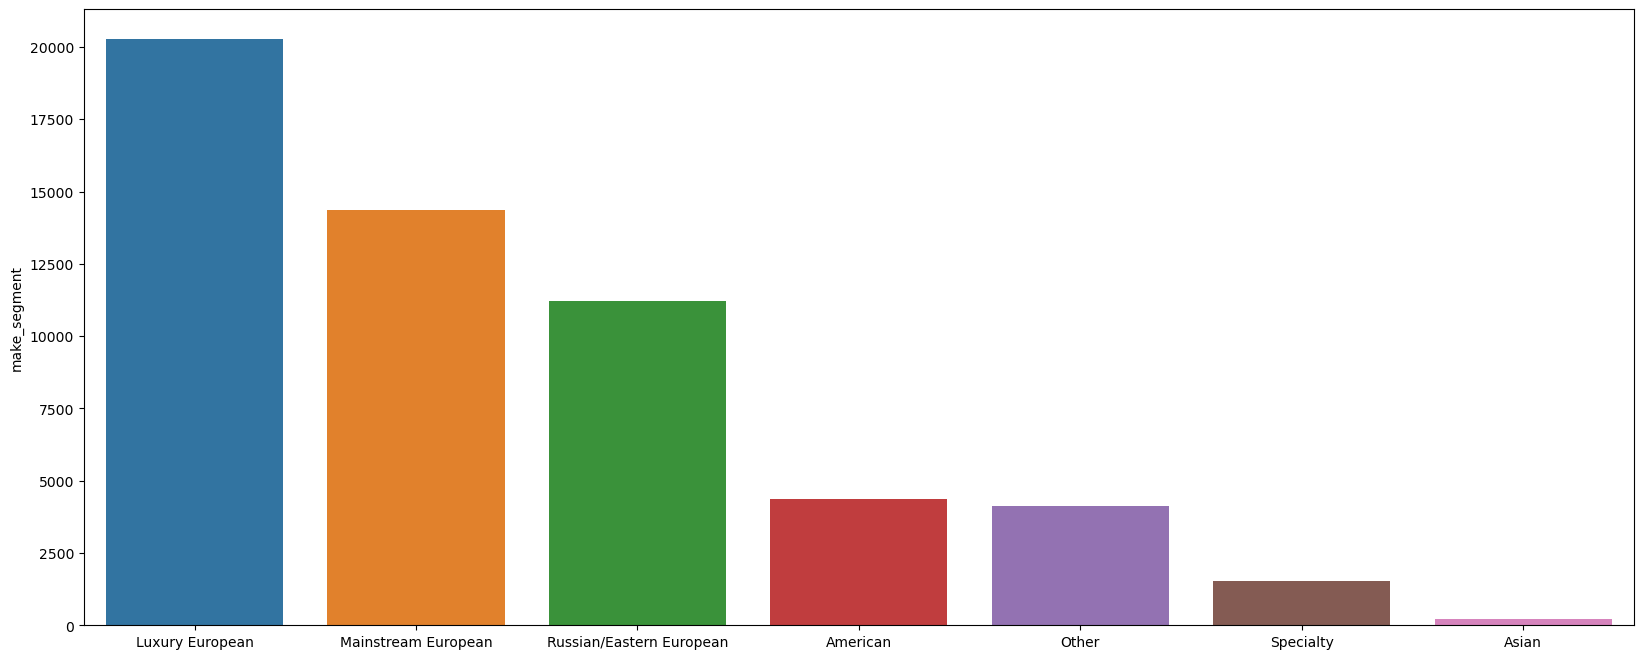

In [66]:
plt.figure(figsize=(20,8))
sns.barplot(data=df,x=df['make_segment'].unique(),y=df['make_segment'].value_counts(),width=0.8)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Luxury European'),
  Text(1, 0, 'Mainstream European'),
  Text(2, 0, 'Russian/Eastern European'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Specialty'),
  Text(6, 0, 'Asian')])

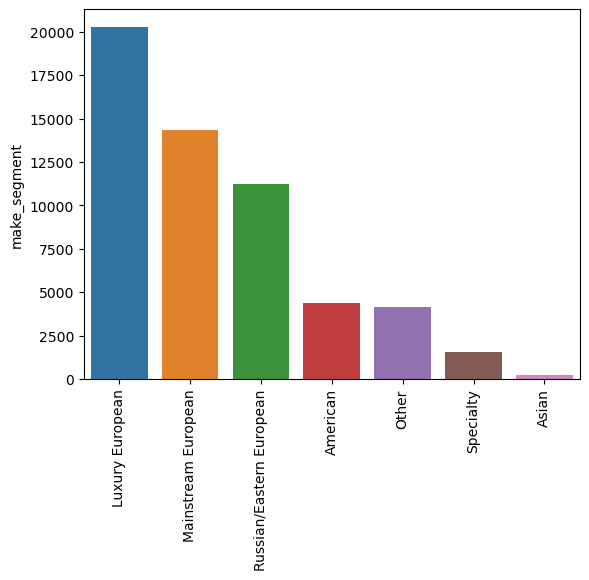

In [63]:
sns.barplot(data=df,x=df['make_segment'].unique(),y=df['make_segment'].value_counts(),width=0.8)
plt.xticks(rotation=90)

from above plot we can easily says that the Luxury European cars has mostly selled car and asian cars are less selled

# Ctaegorical distribution

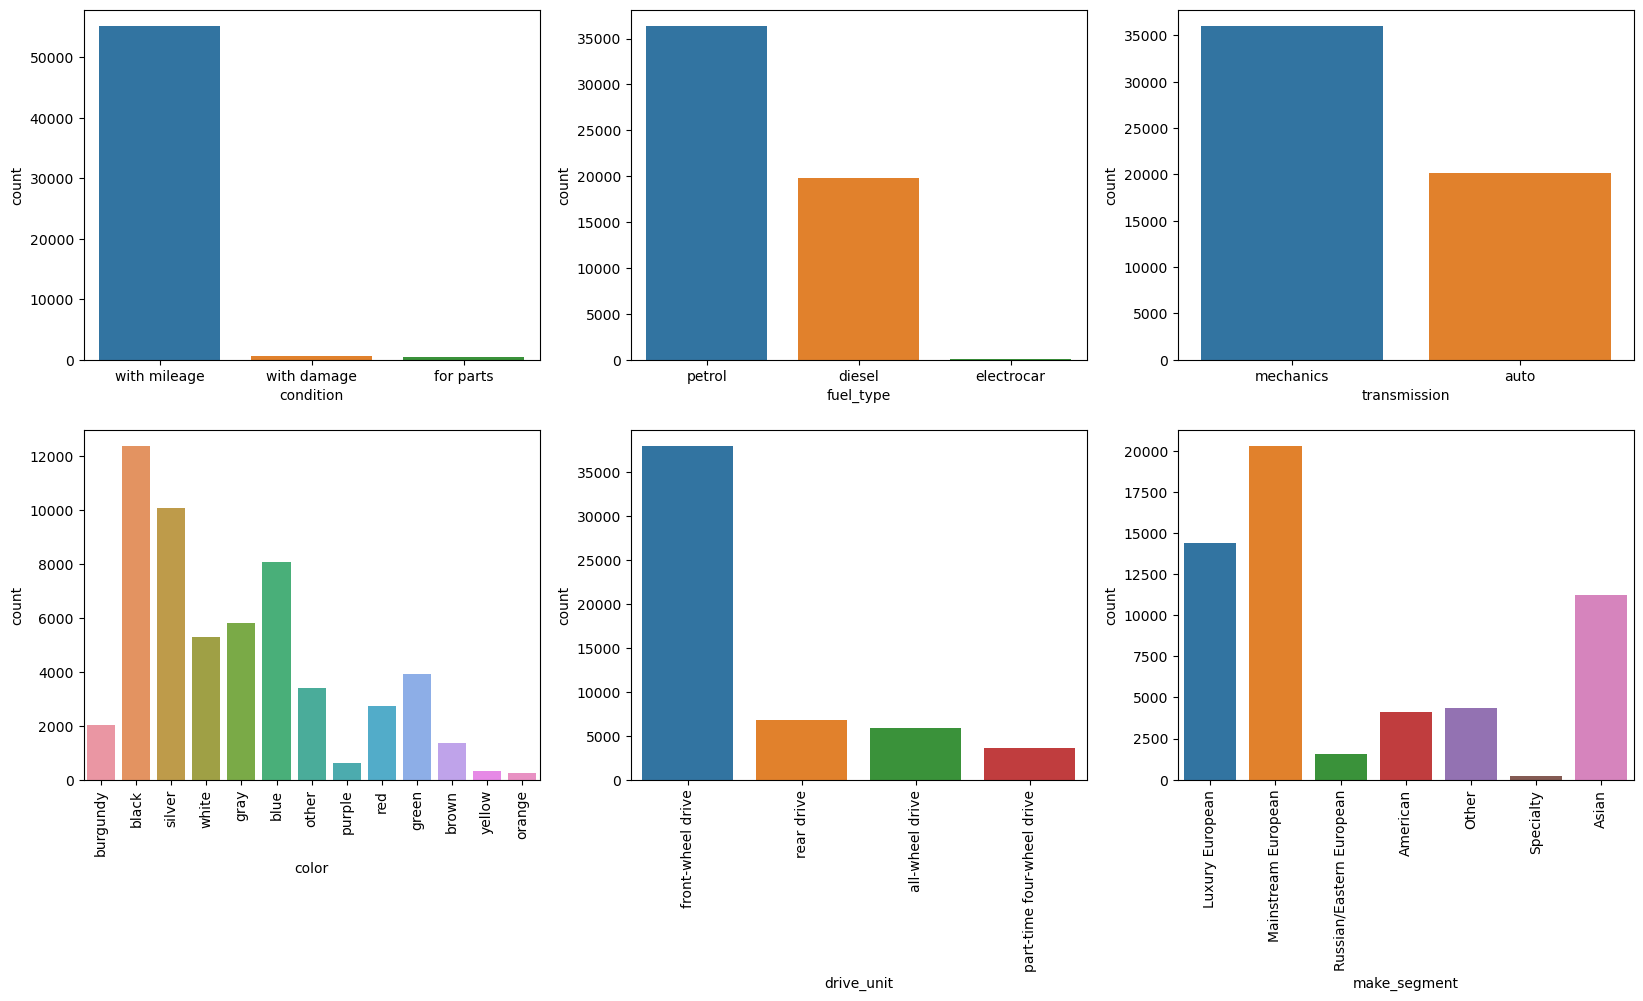

In [75]:
# draw all the catgeorical columns at a time
fig, ax=plt.subplots(2,3,figsize=(20,10))
sns.countplot(x='condition',data=df,ax=ax[0,0])
sns.countplot(x='fuel_type',data=df,ax=ax[0,1])
sns.countplot(x='transmission',data=df,ax=ax[0,2])
sns.countplot(x='color', data=df, ax=ax[1,0])
ax[1,0].tick_params(axis='x', rotation=90)
sns.countplot(x='drive_unit', data=df, ax=ax[1,1])
ax[1,1].tick_params(axis='x', rotation=90)
sns.countplot(x='make_segment', data=df, ax=ax[1,2])
ax[1,2].tick_params(axis='x', rotation=90)

# verify the continues variable distribution

<AxesSubplot:xlabel='volume(cm3)', ylabel='Count'>

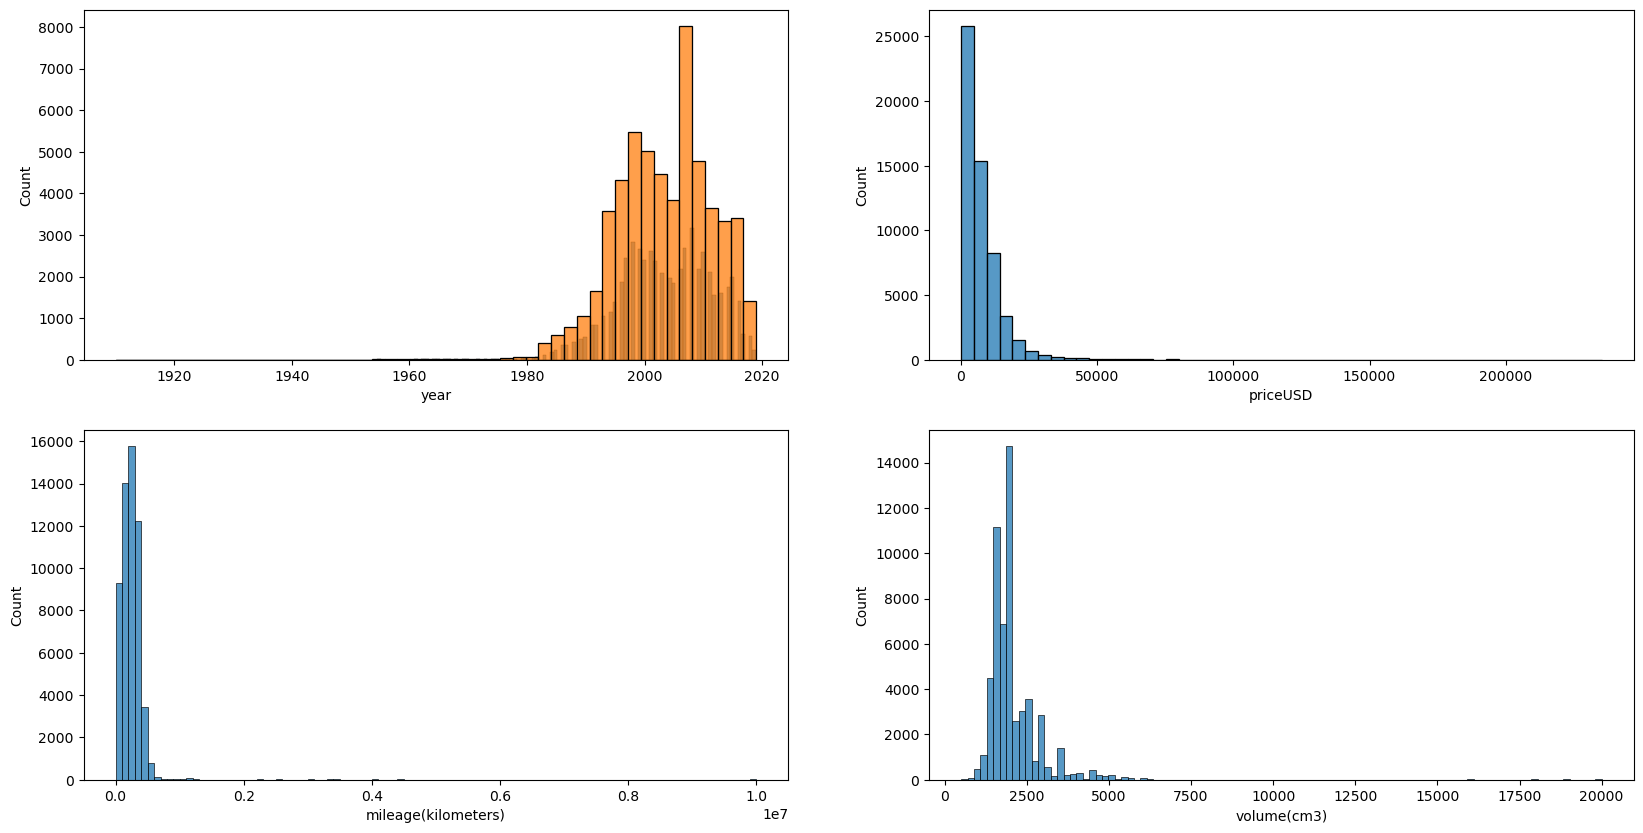

In [82]:
fig, ax=plt.subplots(2,2, figsize=(20,10))
sns.histplot(data=df,x='year',ax=ax[0,0])
sns.histplot (df['year'], ax=ax[0,0], bins = 50)
sns.histplot(df['priceUSD'], ax=ax[0,1],bins=50)
sns.histplot(df['mileage(kilometers)'], ax=ax[1,0], bins = 100)
sns.histplot(df['volume(cm3)'], ax=ax[1,1], bins = 100)

# we an say the left skewed[year] right skewed[price,volume,milleage]

# from the above fig we can say
1. from 1980 to 2020 most of the car get manufactured
2. price is less then 50k usd
3. Milleage is between 0.0 to 0.1

<AxesSubplot:xlabel='year', ylabel='Count'>

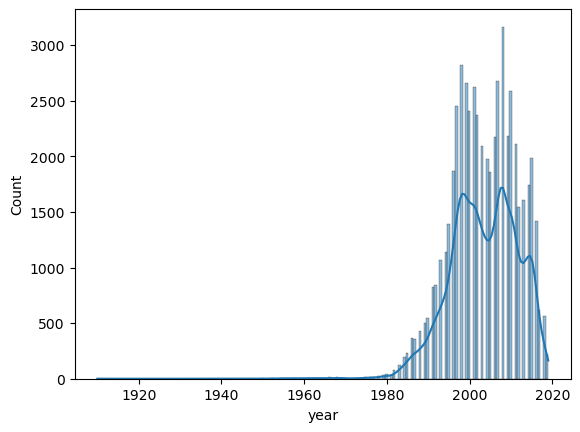

In [80]:
sns.histplot(x=df['year'],kde=True)

In [91]:
# findout the top 10 cars was make

In [85]:
df.head()

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,Luxury European
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,Luxury European
2,mazda,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,Luxury European
3,mazda,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,Luxury European
4,mazda,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,Luxury European


In [88]:
df['make'].value_counts().head(10)

volkswagen       6848
audi             4014
bmw              4006
opel             3769
renault          3704
mercedes-benz    3536
ford             3072
peugeot          2869
nissan           2229
toyota           2173
Name: make, dtype: int64

# top 10 branded cars and their price

In [104]:
demodf = df.groupby('make')['priceUSD'].mean().reset_index()
# used Pandas to group your DataFrame by the 'make' column and calculated the mean of the 'priceUSD' column for each group.
# take the mean of all the make brand and sort this according to priceUSD
data = demodf.sort_values(by='priceUSD', ascending=False)
top10=data.head(10)

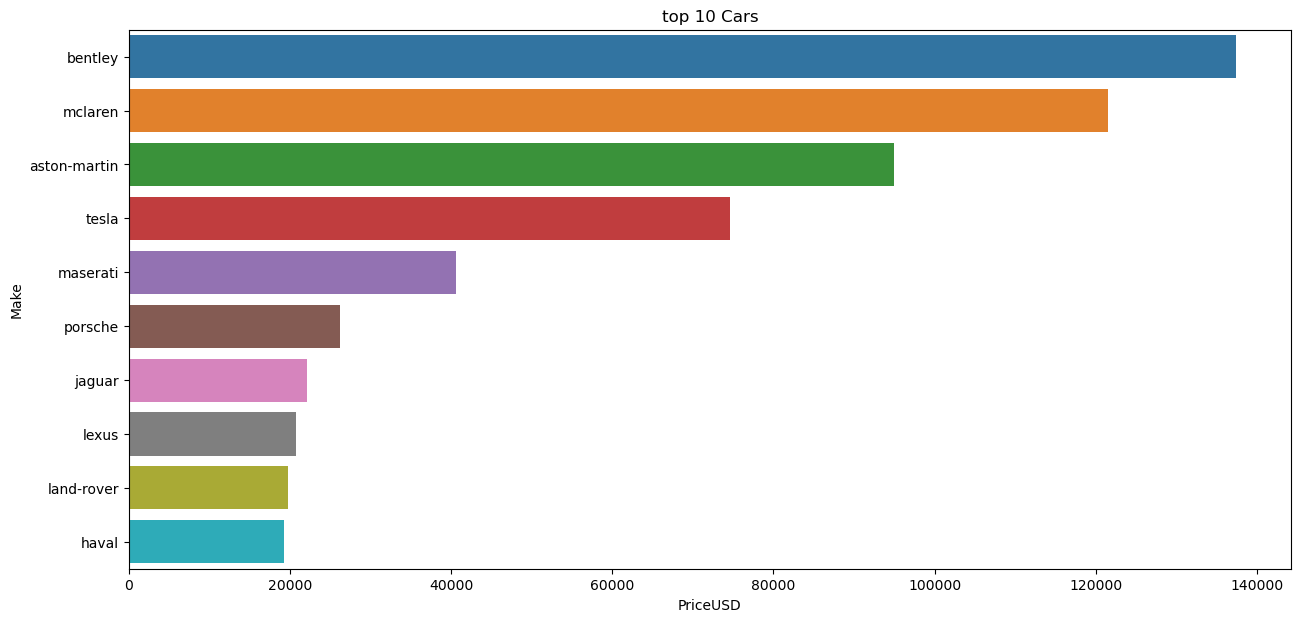

In [108]:
plt.figure(figsize=(15,7))
sns.barplot(data=top10,x='priceUSD',y='make')
plt.title('top 10 Cars')
plt.xlabel('PriceUSD')
plt.ylabel('Make')
plt.show()

# Q2. from 2015 to 2020 which make have the highest manufacture

In [133]:
(df['make'].value_counts()+df['year'].value_counts()).sort_values(ascending=True)

1910       NaN
1933       NaN
1936       NaN
1938       NaN
1942       NaN
            ..
volvo      NaN
vortex     NaN
wartburg   NaN
zaz        NaN
zotye      NaN
Length: 174, dtype: float64

In [135]:
df[['make','year']].sort_values(by='year',ascending=False)

,make,year
44850,renault,2019
50926,mercedes-benz,2019
32770,renault,2019
20995,toyota,2019
53290,bmw,2019
...,...,...
42986,eksklyuziv,1942
43025,eksklyuziv,1938
43020,eksklyuziv,1936
43024,eksklyuziv,1933


In [156]:
df=pd.read_csv('cars.csv')
df = df[df['year'] >= 2015]
df = df[df['year'] <= 2020]

# Group the DataFrame by make and count the number of rows in each group
make_counts = df.groupby('make')['year'].count()

# Sort the make_counts DataFrame by the number of rows in descending order
make_counts = make_counts.sort_values(ascending=False)

# Get the make with the highest count
highest_make = make_counts.index[0:11]

# Print the highest make
print(highest_make)

Index(['renault', 'volkswagen', 'ford', 'bmw', 'toyota', 'mercedes-benz',
       'nissan', 'skoda', 'hyundai', 'kia', 'lada-vaz'],
      dtype='object', name='make')


In [155]:
years = range(2015, 2021)
filtered_data = df[df['year'].isin(years)]

# Group by 'make' and calculate the total production for each make
grouped = filtered_data.groupby('make').sum()

# Find the make with the highest total production
highest_production_make = grouped.idxmax()
total_production = grouped.max()

# Output the result
print("Car make with the highest production from 2015 to 2020:", highest_production_make)
print("Total production for the highest make:", total_production)

Car make with the highest production from 2015 to 2020: priceUSD                      bmw
year                      renault
mileage(kilometers)    volkswagen
volume(cm3)            volkswagen
dtype: object
Total production for the highest make: priceUSD               1.066865e+07
year                   1.201603e+06
mileage(kilometers)    6.681723e+07
volume(cm3)            9.763170e+05
dtype: float64


# price and condition

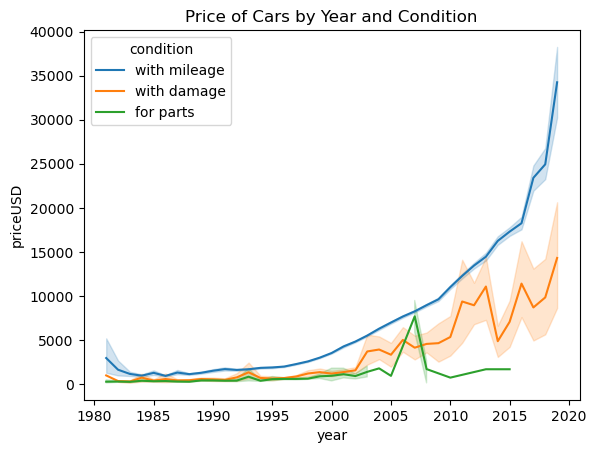

In [164]:
df= df[df['year']>1980]
sns.lineplot(x = 'year', y = 'priceUSD', data = df,hue='condition')
plt.title('Price of Cars by Year and Condition')
plt.show()

# data pre-processing part 2

In [171]:
df.isnull().sum()

make                   0
model                  0
priceUSD               0
year                   0
condition              0
mileage(kilometers)    0
fuel_type              0
volume(cm3)            0
color                  0
transmission           0
drive_unit             0
segment                0
make_segment           0
dtype: int64

In [170]:
df.dropna(inplace=True)

In [172]:
df.drop(columns=['make'],inplace=True)

In [173]:
df.head()

,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,make_segment
0,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B,Luxury European
1,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B,Luxury European
2,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B,Luxury European
3,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B,Luxury European
4,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B,Luxury European


# Label encoding for object data type

In [175]:
df.columns

Index(['model', 'priceUSD', 'year', 'condition', 'mileage(kilometers)',
       'fuel_type', 'volume(cm3)', 'color', 'transmission', 'drive_unit',
       'segment', 'make_segment'],
      dtype='object')

In [177]:
df.dtypes

model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
drive_unit              object
segment                 object
make_segment            object
dtype: object

In [218]:
from sklearn.preprocessing import LabelEncoder

# columns to encode
cols = ['condition', 'fuel_type', 'transmission', 'color', 'drive_unit', 'make_segment']

# Label encoding Object 
le = LabelEncoder()

#label encoding for each column
for col in cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    print(col, df[col].unique())

condition [2 1 0]
fuel_type [1 0]
transmission [1 0]
color [ 3  0 10 11  4  1  7  8  9  5  2 12  6]
drive_unit [1 3 0 2]
make_segment [2 3 5 6 4 1 0]


# find the corr

In [228]:
df.corr()

,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,make_segment
model,1.000000,0.158078,0.182649,0.018896,-0.028430,-0.104139,0.055539,-0.000458,-0.067716,-0.209793,0.322490,0.031029
priceUSD,0.158078,1.000000,0.656964,0.090807,-0.177728,-0.116007,0.260532,-0.105998,-0.467194,-0.147831,0.342294,-0.015943
year,0.182649,0.656964,1.000000,0.123005,-0.255952,-0.060661,0.025874,-0.069050,-0.405194,-0.186750,0.146639,-0.113684
condition,0.018896,0.090807,0.123005,1.000000,-0.032730,-0.027876,0.024925,-0.010883,-0.059094,-0.005894,0.054371,0.018619
mileage(kilometers),-0.028430,-0.177728,-0.255952,-0.032730,1.000000,-0.080602,0.016323,0.015881,0.104585,0.058165,0.005260,0.031126
fuel_type,-0.104139,-0.116007,-0.060661,-0.027876,-0.080602,1.000000,-0.060074,0.002739,-0.086309,-0.020673,-0.220797,-0.069094
volume(cm3),0.055539,0.260532,0.025874,0.024925,0.016323,-0.060074,1.000000,-0.094259,-0.330488,0.030982,0.339125,0.020216
color,-0.000458,-0.105998,-0.069050,-0.010883,0.015881,0.002739,-0.094259,1.000000,0.102172,-0.021608,-0.064758,-0.001561
transmission,-0.067716,-0.467194,-0.405194,-0.059094,0.104585,-0.086309,-0.330488,0.102172,1.000000,0.014098,-0.248833,0.060901
drive_unit,-0.209793,-0.147831,-0.186750,-0.005894,0.058165,-0.020673,0.030982,-0.021608,0.014098,1.000000,-0.003439,0.122093


<AxesSubplot:>

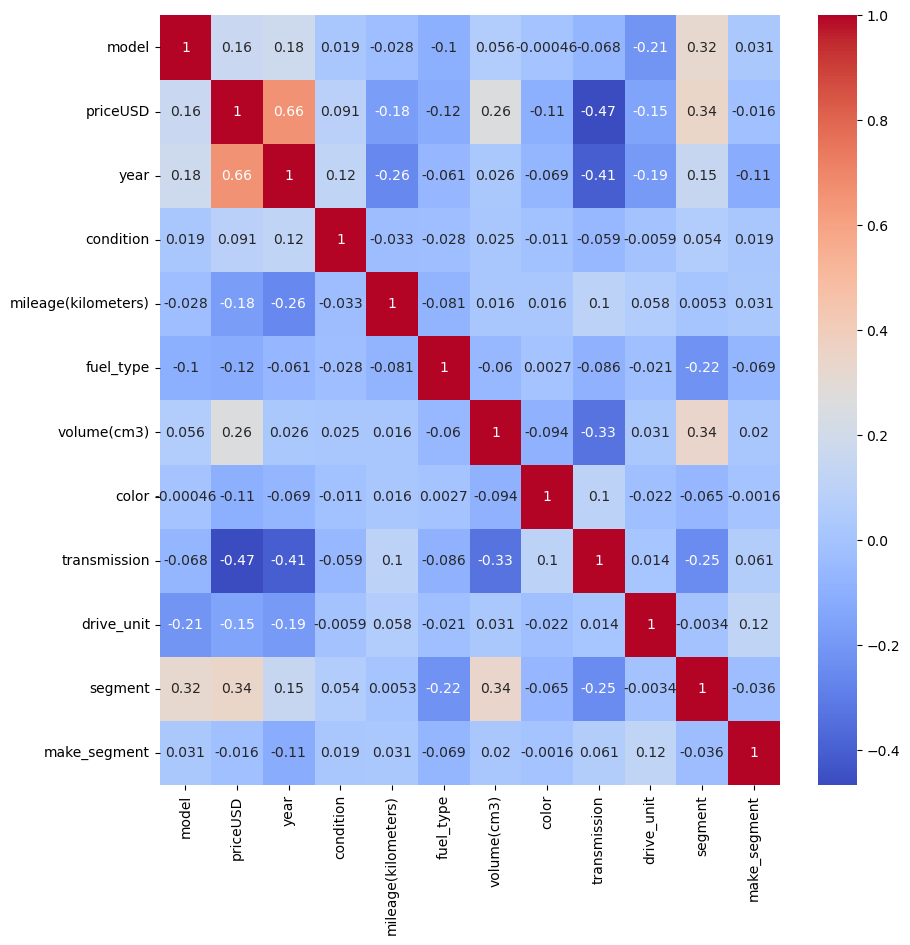

In [229]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# from above ma we can conclude that the year and priceUSD are highly coorelatd

In [230]:
# remove outliers

<AxesSubplot:>

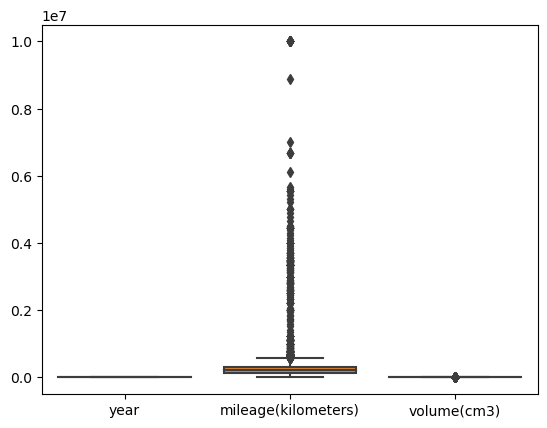

In [231]:
sns.boxplot(data=df[['year', 'mileage(kilometers)', 'volume(cm3)']])

In [247]:
# Using Z-score to remove outliers
from scipy import stats
df2=df.drop(columns='cols')

z = np.abs(stats.zscore(df2))

threshold = 3

#columns with outliers
cols = ['year', 'mileage(kilometers)', 'volume(cm3)']

#removing outliers
df1 = df2[(z < 3).all(axis=1)]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'model'),
  Text(1, 0, 'priceUSD'),
  Text(2, 0, 'year'),
  Text(3, 0, 'condition'),
  Text(4, 0, 'mileage(kilometers)'),
  Text(5, 0, 'fuel_type'),
  Text(6, 0, 'volume(cm3)'),
  Text(7, 0, 'color'),
  Text(8, 0, 'transmission'),
  Text(9, 0, 'drive_unit'),
  Text(10, 0, 'segment'),
  Text(11, 0, 'make_segment')])

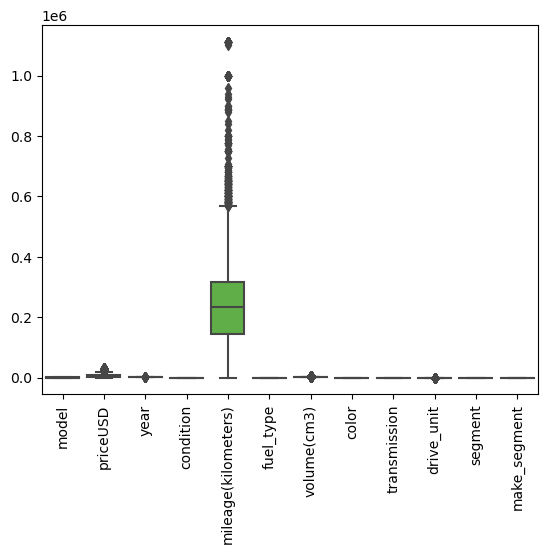

In [248]:
sns.boxplot(data=df1)
plt.xticks(rotation=90)

# train test split

In [251]:
X=df2.drop(columns='priceUSD')
y=df2['priceUSD']

In [252]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Model Building

In [253]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [254]:
from sklearn.model_selection import GridSearchCV

params={
    'max_depth': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0,42]
}

grid=GridSearchCV(dtr,param_grid=params,cv=5,verbose=1)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8],
                         'random_state': [0, 42]},
             verbose=1)

In [255]:
print(grid.best_params_)

{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}


In [256]:
dtr=DecisionTreeRegressor(max_depth= 8, max_features= 'auto', min_samples_leaf= 4, min_samples_split= 2, random_state= 0)

In [257]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=4,
                      random_state=0)

In [258]:
dtr.score(X_train,y_train)

0.8895811460840038

In [259]:
y_pred = dtr.predict(X_test)

In [260]:
# model evaluation

In [262]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2_score(y_test,y_pred)
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error:  105894504.23881324
Mean Absolute Error:  7240.531572036205
Root Mean Squared Error:  10290.505538544412


In [264]:
r2_score(y_pred,y_test)

-0.9624703556373804